In [363]:
# import numpy as np
# import pandas as pd
# df = pd.read_csv('cmake-build-debug/outputCSV.csv', header=[0,1])
# plt.plot(0, 0, marker = 'o', markersize=20, color="black")
# plt.xlim(-1.1, 1.1)
# plt.ylim(-1.1, 1.1)

In [364]:
from scipy.optimize import curve_fit
import mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline


df = pd.read_csv('cmake-build-debug/outputCSV.csv', header=[0,1])
idx = pd.IndexSlice

def doPlot2D(x, y, width, height, colour, replot: bool):

    
    # plt.style.use('seaborn-v0_8-deep')

    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)

    plt.plot(x, y, alpha=0.7, color=colour)

    # ax.set_xlim(xlim[0], xlim[1])
    # ax.set_ylim(ylim[0], ylim[1])

    # plt.title(f"T = {df.Iteration.iat[-1]}")
    plt.grid(alpha=0.3)

# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
def doPlot3D(x, y, z):
 
    # plt.style.use('seaborn-v0_8-deep')

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.scatter3D(0, 0, 0, s=50, c="black")
    ax.plot3D(x, y, z, c="green")

#### Simple 2D x,y position

(100001, 30)


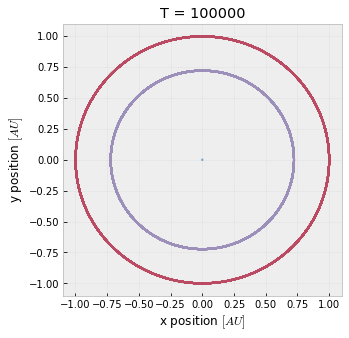

In [365]:
fig, ax = plt.subplots()
# fig.set_size_inches(10, 10)
fig.set_size_inches(5,5)
# plt.plot(0, 0, marker = 'o', markersize=5, color="black") # sun plot
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)

for i in range(0, int(df.shape[1]/10)):
    x = df[f'{i}']['x']
    y = df[f'{i}']['y']

    plt.plot(x, y, alpha=0.7)

plt.grid(alpha=0.3)
plt.xlabel("x position $[AU]$")
plt.ylabel("y position $[AU]$")
plt.title(f"T = {df.shape[0]-1}")

print(df.shape)

In [366]:
## New Method
x = df.loc[:,idx[:,'x']]
y = df.loc[:,idx[:,'y']]
z = df.loc[:,idx[:,'z']]

fx = df.loc[:,idx[:,'fx']]
fy = df.loc[:,idx[:,'fy']]
fz = df.loc[:,idx[:,'fz']]

vx = df.loc[:,idx[:,'vx']]
vy = df.loc[:,idx[:,'vy']]
vz = df.loc[:,idx[:,'vz']]

## Old Method
mass = df[f'{i}']['M']
x = df[f'{i}']['x']
y = df[f'{i}']['y']
z = df[f'{i}']['z']
vx = df[f'{i}']['vx']
vy = df[f'{i}']['vy']
vz = df[f'{i}']['vz']
fx = df[f'{i}']['fx']
fy = df[f'{i}']['fy']
fz = df[f'{i}']['fz']

## **Energy of System**

**Gravitational Potential Energy**

because of the way the forces are calculated, each pair-wise force appears twice.
to account for this, forces must be halved =>

**GPE** -> force * 0.5

**Kinetic Energy**

**KE** = 1/2 * mass * velocity^2

In [367]:
# USE THIS INSTEAD OF FOR LOOPS, MUCH MUCH FASTER
# idx = pd.IndexSlice ->> moved to top level
test3 = df.loc[:,idx[:,'fx']]
test4 = df.cumsum(axis=0)['0']['fx']

##### Calculating $E_{p, 0}$         [*initial total gravitational potential energy*]

In [368]:
# GPE => F_total * 0.5
# this loops through all bodies to calculate GPE_0 for system
gravPotEnergy0 = 0.0;
for i in range(0, int(df.shape[1]/9)):
    fx = df[f'{i}']['fx'][0]
    fy = df[f'{i}']['fy'][0]
    fz = df[f'{i}']['fz'][0]

    gravPotEnergy0 += 0.5 * (fx + fy + fz)
print(gravPotEnergy0)

-0.00043111236281500004


##### Calculating $E_{k, 0}$         [*initial total kinetic energy*]

In [369]:
# KE => 0.5 * mass * velocity^2
# this loops through all bodies to calculate KE_0 for system
kineticEnergy0 = 0.0;
for i in range(0, int(df.shape[1]/9)):
    vx   = df[f'{i}']['vx'][0]
    vy   = df[f'{i}']['vy'][0]
    vz   = df[f'{i}']['vz'][0]
    mass = df[f'{i}']['M' ][0]

    velocity = np.sqrt(vx**2 + vy**2 + vz**2)

    kineticEnergy0 += 0.5 * mass * velocity**2
print(kineticEnergy0)

0.0028319840374660004


##### Calculating $E_{total, 0}$         [*initial total energy*]

In [370]:
# Units are as follows:
# GPE ->> AU/days^2
# KE  ->> ( Solar Masses * AU^2 ) / days^2
totalE0 = gravPotEnergy0 + kineticEnergy0
print(totalE0)

0.0024008716746510006


##### Plotting $E_{total}$ percentage difference over time    

In [371]:
# Pandas is painful
x = df.loc[:,idx[:,'x']]
y = df.loc[:,idx[:,'y']]
z = df.loc[:,idx[:,'z']]

fx = df.loc[:,idx[:,'fx']]
fy = df.loc[:,idx[:,'fy']]
fz = df.loc[:,idx[:,'fz']]

vx = df.loc[:,idx[:,'vx']]
vy = df.loc[:,idx[:,'vy']]
vz = df.loc[:,idx[:,'vz']]

mass = df.loc[:,idx[:,'M']]
mass = mass.groupby(level=0, axis=1).sum()

fx_sum = fx.cumsum(axis=1)
fy_sum = fy.cumsum(axis=1)
fz_sum = fz.cumsum(axis=1)

f_sum = fx_sum.iloc[:,-1] + fy_sum.iloc[:,-1] + fz_sum.iloc[:,-1]

vxSq = vx**2
vySq = vy**2
vzSq = vz**2

vxSq, vySq = vxSq.align(vySq, fill_value=0)
vxSq, vzSq = vxSq.align(vzSq, fill_value=0)
vxSq, vySq = vxSq.align(vySq, fill_value=0)

vSqr = vxSq + vySq + vzSq
vSqr = vSqr.groupby(level=0, axis=1).sum()

dfKE = 0.5 * mass * vSqr

kineticEnergy = dfKE.cumsum(axis=1).iloc[:,-1]
gravPotEnergy = 0.5 * (f_sum)
totalEnergy   = kineticEnergy + gravPotEnergy 

# print(totalEnergy)
# print(gravPotEnergy)
# print(kineticEnergy)

0.0
y = 0.00000x + 0.17937


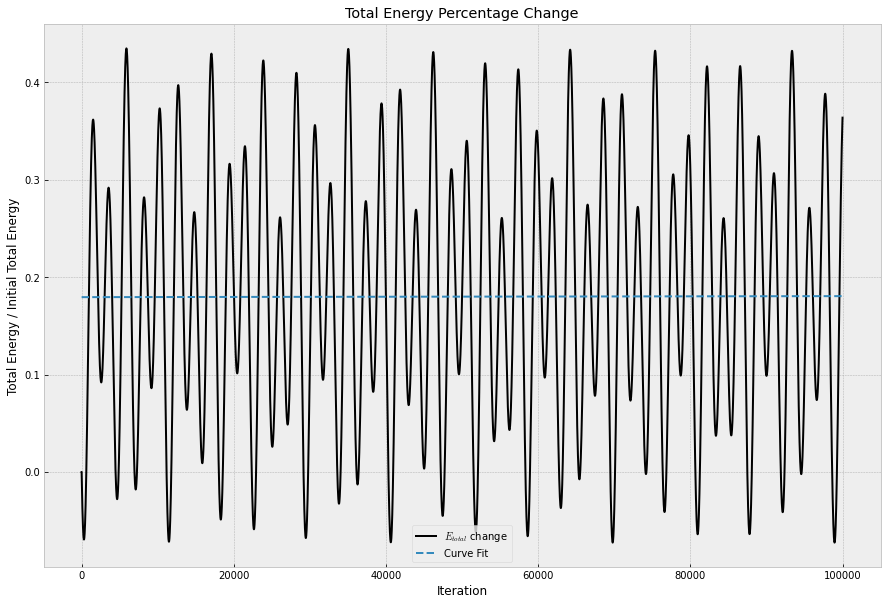

In [372]:
# Create plot environment
plt.style.use('bmh')
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

# Variable setting
iterations = np.arange(0, df.shape[0]);

x = iterations
y = (totalEnergy/totalEnergy[0]) - 1
print(y[0])
# Plot graph
plt.plot(x, y, color="black", label="$E_{total}$ change");
plt.title("Total Energy Percentage Change")
plt.xlabel("Iteration");
plt.ylabel("Total Energy / Initial Total Energy")


# Curve fit objective function
def func(x, a, b):
    return a * x + b

# Curve fit
popt, cov = curve_fit(func, x, y)

# Summarise parameter values
a, b = popt
print('y = %.5fx + %.5f' % (a, b))

# Calculate output for range
y_line = func(x, a, b)

# Plot curve fit line
plt.plot(x, y_line, linestyle='--', label="Curve Fit")

plt.legend()
plt.show()

In [373]:
# test = df.set_index('fx').cumsum(axis=1)
# print (test)
orb = 1

# test = df[f'{orb}']['fx']
# print(test)

# test2 = df.groupby(['fx'])
# print(test2)

# print (df.iloc[:, df.columns.get_level_values(1)=='fx'])

x = df.loc[:,idx[:,'x']]
y = df.loc[:,idx[:,'y']]
z = df.loc[:,idx[:,'z']]

fx = df.loc[:,idx[:,'fx']]
fy = df.loc[:,idx[:,'fy']]
fz = df.loc[:,idx[:,'fz']]

vx = df.loc[:,idx[:,'vx']]
vy = df.loc[:,idx[:,'vy']]
vz = df.loc[:,idx[:,'vz']]

# print(vx.cumsum(axis=1)) # use this to get cumulative sum over a row

fx_sum = fx.cumsum(axis=1)
fy_sum = fy.cumsum(axis=1)
fz_sum = fz.cumsum(axis=1)

f_sum = fx_sum.iloc[:,-1] + fy_sum.iloc[:,-1] + fz_sum.iloc[:,-1]



# print(fx_sum.iloc[:,-1])
# print(fy_sum.iloc[:,-1])
print(f_sum)

0        -0.000862
1        -0.000862
2        -0.000864
3        -0.000866
4        -0.000868
            ...   
99996     0.000866
99997     0.000867
99998     0.000868
99999     0.000870
100000    0.000871
Length: 100001, dtype: float64


In [374]:


# fx = df[f'{orb}']['fx'][step]
# fy = df[f'{orb}']['fy'][step]
# fz = df[f'{orb}']['fz'][step]

# gravPotEnergy += 0.5 * (fx + fy + fz)

# # Kinetic Energy
# vx   = df[f'{orb}']['vx'][step]
# vy   = df[f'{orb}']['vy'][step]
# vz   = df[f'{orb}']['vz'][step]
# mass = df[f'{orb}']['M' ][0]

# velocitySqr = vx**2 + vy**2 + vz**2

# kineticEnergy += 0.5 * mass * velocitySqr #**2


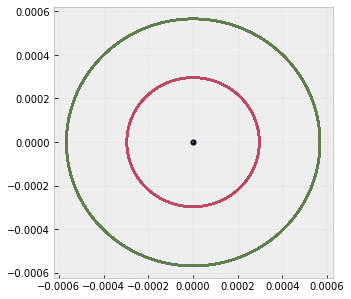

In [375]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
plt.plot(0, 0, marker = 'o', markersize=5, color="black")
for i in range(0, int(df.shape[1]/10)):
    x = df[f'{i}']['fx']
    y = df[f'{i}']['fy']

    plt.plot(x, y, alpha=0.7)
    plt.grid(alpha=0.3)
# x = df[f'{1}']['fx']
# y = df[f'{1}']['fy']
plt.plot(x, y, alpha=0.7)
plt.grid(alpha=0.3)

In [376]:
print(len(df.columns[0]))
print(len(df.columns[3]) + 1)
print(df.shape[1]/6)

2
3
5.0


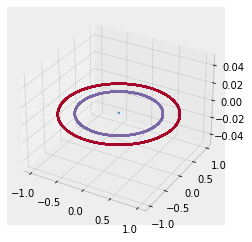

In [377]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# plt.xlim(-100, 100)
# plt.ylim(-100, 100)
# plt.zlim(-100, 100)
# ax.set_xlim(-10, 10)
# ax.set_ylim(-10, 10)
# ax.set_zlim(-10, 10)

for i in range(0, int(df.shape[1]/9)):
    x = df[f'{i}']['x']
    y = df[f'{i}']['y']
    z = df[f'{i}']['z']


    # ax.scatter3D(0, 0, 0, s=50, c="black")
    ax.plot3D(x, y, z)

In [378]:
doPlot3D(df.xVel, df.yVel, df.Iteration)

AttributeError: 'DataFrame' object has no attribute 'xVel'

#### **X position vs Y position**
*for all timesteps*

In [ ]:
doPlot2D(df.xPos, df.yPos, 10, 10, colour='black', replot=False)
plt.plot(0, 0, marker = 'o', markersize=20, color="black")
plt.xlabel("$x$ Position [$AU$]")
plt.ylabel("$y$ Position [$AU$]")
# plt.savefig('graphs/x-vs-y_pos_ts_1_1M-steps-wvenus.png', dpi='figure')

#### **Velocity vs Time Step**

In [ ]:
doPlot2D(df.T_S, df.xVel, 20, 10, True)

# **ARCHIVE**

In [ ]:
# Iterate through all timesteps
for step in range(0, df.shape[0]-1):
    # Reset energies
    gravPotEnergy = 0.0
    kineticEnergy = 0.0
    
    # Iterate through all bodies
    for orb in range(0, int(df.shape[1]/10)):
        # Gravitational Potential Energy
        fx = df[f'{orb}']['fx'][step]
        fy = df[f'{orb}']['fy'][step]
        fz = df[f'{orb}']['fz'][step]

        gravPotEnergy += 0.5 * (fx + fy + fz)

        # Kinetic Energy
        vx   = df[f'{orb}']['vx'][step]
        vy   = df[f'{orb}']['vy'][step]
        vz   = df[f'{orb}']['vz'][step]
        mass = df[f'{orb}']['M' ][0]
        
        velocitySqr = vx**2 + vy**2 + vz**2

        kineticEnergy += 0.5 * mass * velocitySqr #**2

    # Calculate Total Energy
    totalEnergy[step] = gravPotEnergy + kineticEnergy

# print(totalEnergy)

In [ ]:
# vxSq = vx**2
# vySq = vy**2
# vzSq = vz**2
# vSqr = vxSq
# print(vSqr)
# vxSq, vySq, vzSqr = vxSq.align(vySq, fill_value=0)
# print(vxSq+vySq)
# vSqr = vxSq.merge(vySq).merge(vzSq)
# vxSq, vySq = vxSq.align(vySq)
# vSqr = vxSq.merge(vySq)
# print(vSqr)

# print()

# mass = df.loc[:,idx[:,'M']]#.cumsum(axis=1)
print(mass)

# print(vxSq + vySq)
# print(vxSq.iloc[:,-1])
# print(vxSq)
# print(vxSq.add(vySq, axis=0))

# mass = df.loc[:,idx[:,'M']]#.cumsum(axis=1)
# print(mass)
# mass_sum = mass.iloc[:,-1]
# f_sum = fx_sum.iloc[:,-1] + fy_sum.iloc[:,-1] + fz_sum.iloc[:,-1]
# v_sum = vx_sum.iloc[:,-1] + vy_sum.iloc[:,-1] + vz_sum.iloc[:,-1]

# print(vx_sum.iloc[:,-1])
# print(v_sum)
